In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import torchvision.models as models
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd


sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')
#seaborn-ticks
from fastai.callbacks import *
from sklearn.metrics import roc_curve, auc
from fastai.vision import *
from glob import glob

In [3]:
df_train = pd.read_csv('/data/zhangjianming/kaggle/sound/data/sound_all.csv')


print('Train Size: ', df_train.shape)


Train Size:  (1600, 3)


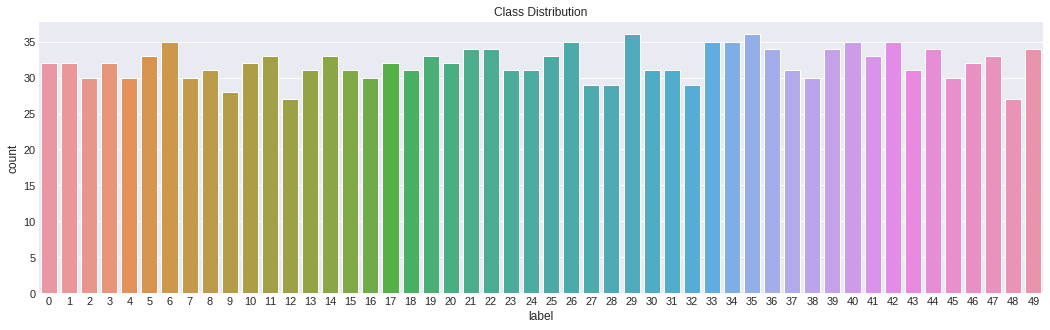

In [6]:
Class = df_train.label.value_counts()
#colours = ["#aaaaaa", "#aaaaaa", "#aaaaaa","#aaaaaa","#aaaaaa","#d11111","#aaaaaa","#aaaaaa","#aaaaaa","#d11111"]
f, ax = plt.subplots(figsize=(18,5)) 
ax = sns.countplot(x='label', data=df_train)
plt.title('Class Distribution');

Class:  42
Sampling Rate:  22050 Hz
Duration:  5.0
Number of samples:  110250


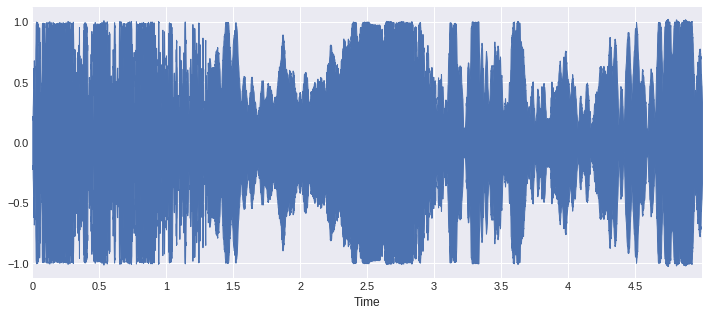

In [9]:
i = random.choice(df_train.index)
y, sr = librosa.load('/data/zhangjianming/kaggle/sound/data/train/' + str(df_train.name[i]))
plt.figure(figsize=(12,5))
librosa.display.waveplot(y,sr);
print('Class: ', df_train.label[i])
print('Sampling Rate: ',sr,'Hz')
print('Duration: ',len(y)/sr)
print('Number of samples: ', len(y))
ipd.Audio(data=y, rate=sr)

In [11]:
# Converting audio to Mel scaled power spectrogram Image
def create_melspec(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate,n_fft=2048, hop_length=512)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/melspec_train/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [12]:
# Converting audio to Mel frequency cepstral coefficients Image
def create_mfccs(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.mfcc(y=clip, sr=sample_rate, dct_type=2)
    librosa.display.specshow(S)
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/mfccs_train/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [13]:
# Converting audio to Chroma Image
def create_chroma(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = np.abs(librosa.stft(clip))
    chroma = librosa.feature.chroma_stft(S=S, sr=sample_rate)
    librosa.display.specshow(chroma)
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/chroma_train/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [14]:
Data_dir=np.array(glob("/data/zhangjianming/kaggle/sound/data/train/*"))

for file in Data_dir:
    print(file)
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_melspec(filename,name);
    create_mfccs(filename,name);
    create_chroma(filename,name);

/data/zhangjianming/kaggle/sound/data/train/4-186940-A-44.wav
/data/zhangjianming/kaggle/sound/data/train/3-70962-C-4.wav
/data/zhangjianming/kaggle/sound/data/train/3-164630-A-11.wav
/data/zhangjianming/kaggle/sound/data/train/2-117617-A-48.wav
/data/zhangjianming/kaggle/sound/data/train/3-155659-A-34.wav
/data/zhangjianming/kaggle/sound/data/train/2-37806-D-40.wav
/data/zhangjianming/kaggle/sound/data/train/2-117271-A-0.wav
/data/zhangjianming/kaggle/sound/data/train/3-108677-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/3-163727-A-3.wav
/data/zhangjianming/kaggle/sound/data/train/5-213836-A-9.wav
/data/zhangjianming/kaggle/sound/data/train/3-115387-A-47.wav
/data/zhangjianming/kaggle/sound/data/train/1-49098-A-35.wav
/data/zhangjianming/kaggle/sound/data/train/1-22882-A-44.wav
/data/zhangjianming/kaggle/sound/data/train/1-172649-C-40.wav
/data/zhangjianming/kaggle/sound/data/train/3-143560-A-47.wav
/data/zhangjianming/kaggle/sound/data/train/1-73123-A-26.wav
/data/zhangjianmi

/data/zhangjianming/kaggle/sound/data/train/4-251645-A-49.wav
/data/zhangjianming/kaggle/sound/data/train/4-189833-A-22.wav
/data/zhangjianming/kaggle/sound/data/train/3-160993-A-3.wav
/data/zhangjianming/kaggle/sound/data/train/1-30226-A-0.wav
/data/zhangjianming/kaggle/sound/data/train/3-141559-A-45.wav
/data/zhangjianming/kaggle/sound/data/train/1-50661-A-44.wav
/data/zhangjianming/kaggle/sound/data/train/3-127874-A-17.wav
/data/zhangjianming/kaggle/sound/data/train/5-219242-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/4-188293-A-15.wav
/data/zhangjianming/kaggle/sound/data/train/5-205589-A-17.wav
/data/zhangjianming/kaggle/sound/data/train/3-203375-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/3-133977-A-29.wav
/data/zhangjianming/kaggle/sound/data/train/2-127109-A-6.wav
/data/zhangjianming/kaggle/sound/data/train/4-165791-B-45.wav
/data/zhangjianming/kaggle/sound/data/train/1-57795-A-8.wav
/data/zhangjianming/kaggle/sound/data/train/5-242491-A-14.wav
/data/zhangjian

/data/zhangjianming/kaggle/sound/data/train/5-249748-A-28.wav
/data/zhangjianming/kaggle/sound/data/train/5-207681-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/3-126113-A-26.wav
/data/zhangjianming/kaggle/sound/data/train/1-21896-A-35.wav
/data/zhangjianming/kaggle/sound/data/train/5-202540-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/4-172734-A-36.wav
/data/zhangjianming/kaggle/sound/data/train/2-114609-A-28.wav
/data/zhangjianming/kaggle/sound/data/train/2-42101-A-43.wav
/data/zhangjianming/kaggle/sound/data/train/3-96606-A-49.wav
/data/zhangjianming/kaggle/sound/data/train/4-175000-A-40.wav
/data/zhangjianming/kaggle/sound/data/train/3-94342-A-25.wav
/data/zhangjianming/kaggle/sound/data/train/1-68734-A-34.wav
/data/zhangjianming/kaggle/sound/data/train/4-177835-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/2-52789-A-4.wav
/data/zhangjianming/kaggle/sound/data/train/5-242492-A-3.wav
/data/zhangjianming/kaggle/sound/data/train/2-160888-A-47.wav
/data/zhangjianm

/data/zhangjianming/kaggle/sound/data/train/4-182369-A-12.wav
/data/zhangjianming/kaggle/sound/data/train/5-179865-A-43.wav
/data/zhangjianming/kaggle/sound/data/train/3-155642-B-11.wav
/data/zhangjianming/kaggle/sound/data/train/2-126433-A-17.wav
/data/zhangjianming/kaggle/sound/data/train/2-54961-A-23.wav
/data/zhangjianming/kaggle/sound/data/train/2-81970-B-7.wav
/data/zhangjianming/kaggle/sound/data/train/1-29532-A-16.wav
/data/zhangjianming/kaggle/sound/data/train/4-157296-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/3-144253-A-29.wav
/data/zhangjianming/kaggle/sound/data/train/3-112557-B-23.wav
/data/zhangjianming/kaggle/sound/data/train/1-97793-A-31.wav
/data/zhangjianming/kaggle/sound/data/train/5-215005-A-32.wav
/data/zhangjianming/kaggle/sound/data/train/2-68391-A-41.wav
/data/zhangjianming/kaggle/sound/data/train/4-176631-A-43.wav
/data/zhangjianming/kaggle/sound/data/train/1-80785-A-7.wav
/data/zhangjianming/kaggle/sound/data/train/1-31482-B-42.wav
/data/zhangjianmi

/data/zhangjianming/kaggle/sound/data/train/1-96950-B-9.wav
/data/zhangjianming/kaggle/sound/data/train/3-142601-A-21.wav
/data/zhangjianming/kaggle/sound/data/train/4-218199-F-35.wav
/data/zhangjianming/kaggle/sound/data/train/4-204777-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/4-59579-B-20.wav
/data/zhangjianming/kaggle/sound/data/train/4-188191-C-29.wav
/data/zhangjianming/kaggle/sound/data/train/4-172366-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/1-33658-A-26.wav
/data/zhangjianming/kaggle/sound/data/train/5-212730-A-17.wav
/data/zhangjianming/kaggle/sound/data/train/1-7456-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/4-149294-A-41.wav
/data/zhangjianming/kaggle/sound/data/train/1-71030-A-6.wav
/data/zhangjianming/kaggle/sound/data/train/5-257642-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/1-101404-A-34.wav
/data/zhangjianming/kaggle/sound/data/train/2-32834-A-4.wav
/data/zhangjianming/kaggle/sound/data/train/3-145719-A-17.wav
/data/zhangjianmin

/data/fastai/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


/data/zhangjianming/kaggle/sound/data/train/3-116135-A-1.wav
/data/zhangjianming/kaggle/sound/data/train/5-186924-A-12.wav
/data/zhangjianming/kaggle/sound/data/train/1-103298-A-9.wav
/data/zhangjianming/kaggle/sound/data/train/5-156999-D-19.wav
/data/zhangjianming/kaggle/sound/data/train/2-7321-A-33.wav
/data/zhangjianming/kaggle/sound/data/train/5-254160-A-22.wav
/data/zhangjianming/kaggle/sound/data/train/3-163288-A-1.wav
/data/zhangjianming/kaggle/sound/data/train/3-104958-A-12.wav
/data/zhangjianming/kaggle/sound/data/train/3-92637-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/4-156227-A-9.wav
/data/zhangjianming/kaggle/sound/data/train/1-155858-C-25.wav
/data/zhangjianming/kaggle/sound/data/train/4-218304-B-25.wav
/data/zhangjianming/kaggle/sound/data/train/2-28314-A-12.wav
/data/zhangjianming/kaggle/sound/data/train/1-36402-A-23.wav
/data/zhangjianming/kaggle/sound/data/train/5-204352-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/5-207836-B-29.wav
/data/zhangjianmi

/data/zhangjianming/kaggle/sound/data/train/2-128465-A-43.wav
/data/zhangjianming/kaggle/sound/data/train/5-204352-B-13.wav
/data/zhangjianming/kaggle/sound/data/train/2-122820-B-36.wav
/data/zhangjianming/kaggle/sound/data/train/2-70938-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/4-140034-A-46.wav
/data/zhangjianming/kaggle/sound/data/train/1-17092-A-27.wav
/data/zhangjianming/kaggle/sound/data/train/5-216214-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/1-37226-A-29.wav
/data/zhangjianming/kaggle/sound/data/train/4-99644-A-4.wav
/data/zhangjianming/kaggle/sound/data/train/2-64962-A-15.wav
/data/zhangjianming/kaggle/sound/data/train/1-27166-A-35.wav
/data/zhangjianming/kaggle/sound/data/train/4-125929-A-40.wav
/data/zhangjianming/kaggle/sound/data/train/4-204123-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/1-54918-A-14.wav
/data/zhangjianming/kaggle/sound/data/train/4-123680-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/5-263491-A-25.wav
/data/zhangjianm

/data/zhangjianming/kaggle/sound/data/train/5-241846-A-15.wav
/data/zhangjianming/kaggle/sound/data/train/3-163607-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/5-215172-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/5-233607-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/2-134049-A-6.wav
/data/zhangjianming/kaggle/sound/data/train/3-71964-B-4.wav
/data/zhangjianming/kaggle/sound/data/train/5-212181-A-38.wav
/data/zhangjianming/kaggle/sound/data/train/1-29680-A-21.wav
/data/zhangjianming/kaggle/sound/data/train/4-157611-B-41.wav
/data/zhangjianming/kaggle/sound/data/train/2-117116-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/5-208810-A-11.wav
/data/zhangjianming/kaggle/sound/data/train/1-115920-A-22.wav
/data/zhangjianming/kaggle/sound/data/train/2-80844-A-13.wav
/data/zhangjianming/kaggle/sound/data/train/1-77160-A-3.wav
/data/zhangjianming/kaggle/sound/data/train/5-156026-B-4.wav
/data/zhangjianming/kaggle/sound/data/train/5-194930-A-1.wav
/data/zhangjianmi

/data/zhangjianming/kaggle/sound/data/train/2-121909-A-35.wav
/data/zhangjianming/kaggle/sound/data/train/3-142604-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/3-118657-A-41.wav
/data/zhangjianming/kaggle/sound/data/train/4-194808-A-29.wav
/data/zhangjianming/kaggle/sound/data/train/1-81001-A-30.wav
/data/zhangjianming/kaggle/sound/data/train/4-117627-A-25.wav
/data/zhangjianming/kaggle/sound/data/train/2-117795-B-3.wav
/data/zhangjianming/kaggle/sound/data/train/5-182007-A-36.wav
/data/zhangjianming/kaggle/sound/data/train/5-197913-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/1-23094-A-15.wav
/data/zhangjianming/kaggle/sound/data/train/3-119459-A-26.wav
/data/zhangjianming/kaggle/sound/data/train/5-244459-A-28.wav
/data/zhangjianming/kaggle/sound/data/train/5-261325-A-9.wav
/data/zhangjianming/kaggle/sound/data/train/5-202898-A-10.wav
/data/zhangjianming/kaggle/sound/data/train/5-243036-A-29.wav
/data/zhangjianming/kaggle/sound/data/train/1-75162-A-9.wav
/data/zhangjia

/data/zhangjianming/kaggle/sound/data/train/5-133989-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/4-145081-A-9.wav
/data/zhangjianming/kaggle/sound/data/train/4-90014-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/4-167077-C-20.wav
/data/zhangjianming/kaggle/sound/data/train/2-78562-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/1-196660-A-8.wav
/data/zhangjianming/kaggle/sound/data/train/4-204683-A-31.wav
/data/zhangjianming/kaggle/sound/data/train/3-118657-B-41.wav
/data/zhangjianming/kaggle/sound/data/train/2-122763-B-29.wav
/data/zhangjianming/kaggle/sound/data/train/5-235874-A-28.wav
/data/zhangjianming/kaggle/sound/data/train/5-232816-A-23.wav
/data/zhangjianming/kaggle/sound/data/train/5-234247-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/2-70939-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/4-185575-C-20.wav
/data/zhangjianming/kaggle/sound/data/train/4-251959-A-47.wav
/data/zhangjianming/kaggle/sound/data/train/4-213193-A-29.wav
/data/zhangji

/data/zhangjianming/kaggle/sound/data/train/3-165856-A-41.wav
/data/zhangjianming/kaggle/sound/data/train/4-193480-B-40.wav
/data/zhangjianming/kaggle/sound/data/train/5-170338-B-41.wav
/data/zhangjianming/kaggle/sound/data/train/5-218981-A-30.wav
/data/zhangjianming/kaggle/sound/data/train/1-53663-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/5-181766-A-10.wav
/data/zhangjianming/kaggle/sound/data/train/5-200461-A-11.wav
/data/zhangjianming/kaggle/sound/data/train/2-95567-A-23.wav
/data/zhangjianming/kaggle/sound/data/train/2-209478-A-25.wav
/data/zhangjianming/kaggle/sound/data/train/3-139109-A-46.wav
/data/zhangjianming/kaggle/sound/data/train/1-32373-B-35.wav
/data/zhangjianming/kaggle/sound/data/train/5-185516-A-27.wav
/data/zhangjianming/kaggle/sound/data/train/3-112356-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/4-175025-A-34.wav
/data/zhangjianming/kaggle/sound/data/train/1-69165-A-34.wav
/data/zhangjianming/kaggle/sound/data/train/3-159348-A-36.wav
/data/zhangj

/data/zhangjianming/kaggle/sound/data/train/4-164064-B-1.wav
/data/zhangjianming/kaggle/sound/data/train/1-32318-A-0.wav
/data/zhangjianming/kaggle/sound/data/train/5-221567-A-22.wav
/data/zhangjianming/kaggle/sound/data/train/2-104877-A-3.wav
/data/zhangjianming/kaggle/sound/data/train/1-31482-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/1-79236-A-36.wav
/data/zhangjianming/kaggle/sound/data/train/4-175856-A-43.wav
/data/zhangjianming/kaggle/sound/data/train/2-108767-B-9.wav
/data/zhangjianming/kaggle/sound/data/train/1-34119-B-1.wav
/data/zhangjianming/kaggle/sound/data/train/1-59513-A-0.wav
/data/zhangjianming/kaggle/sound/data/train/5-117120-A-42.wav
/data/zhangjianming/kaggle/sound/data/train/3-98771-A-18.wav
/data/zhangjianming/kaggle/sound/data/train/5-249937-A-22.wav
/data/zhangjianming/kaggle/sound/data/train/1-34853-A-37.wav
/data/zhangjianming/kaggle/sound/data/train/5-254832-A-15.wav
/data/zhangjianming/kaggle/sound/data/train/3-155642-A-11.wav
/data/zhangjianming/k

/data/zhangjianming/kaggle/sound/data/train/2-18766-A-12.wav
/data/zhangjianming/kaggle/sound/data/train/4-152995-A-24.wav
/data/zhangjianming/kaggle/sound/data/train/1-85184-A-39.wav
/data/zhangjianming/kaggle/sound/data/train/3-126391-B-27.wav
/data/zhangjianming/kaggle/sound/data/train/4-223125-A-14.wav
/data/zhangjianming/kaggle/sound/data/train/1-91359-A-11.wav
/data/zhangjianming/kaggle/sound/data/train/4-163606-A-16.wav
/data/zhangjianming/kaggle/sound/data/train/4-102844-C-49.wav
/data/zhangjianming/kaggle/sound/data/train/5-51149-A-25.wav
/data/zhangjianming/kaggle/sound/data/train/1-30039-A-26.wav
/data/zhangjianming/kaggle/sound/data/train/5-205898-A-40.wav
/data/zhangjianming/kaggle/sound/data/train/5-200329-A-8.wav
/data/zhangjianming/kaggle/sound/data/train/1-51036-A-16.wav
/data/zhangjianming/kaggle/sound/data/train/3-110913-B-7.wav
/data/zhangjianming/kaggle/sound/data/train/5-215658-B-12.wav
/data/zhangjianming/kaggle/sound/data/train/1-100210-B-36.wav
/data/zhangjianm

In [16]:
# Converting audio to Mel scaled power spectrogram Image
def create_melspec_test(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate,n_fft=2048, hop_length=512)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/melspec_test/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [17]:
# Converting audio to Mel frequency cepstral coefficients Image
def create_mfccs_test(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.mfcc(y=clip, sr=sample_rate, dct_type=2)
    librosa.display.specshow(S)
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/mfccs_test/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [18]:
# Converting audio to Chroma Image
def create_chroma_test(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, duration=5)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = np.abs(librosa.stft(clip))
    chroma = librosa.feature.chroma_stft(S=S, sr=sample_rate)
    librosa.display.specshow(chroma)
    filename  = Path('/data/zhangjianming/kaggle/sound/data/audio2img/feature/chroma_test/' + name + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [19]:
Data_dir=np.array(glob("/data/zhangjianming/kaggle/sound/data/test/*"))

for file in Data_dir:
    print(file)
    filename,name = file,file.split('/')[-1].split('.')[0]
    create_melspec_test(filename,name);
    create_mfccs_test(filename,name);
    create_chroma_test(filename,name);

/data/zhangjianming/kaggle/sound/data/test/191.wav
/data/zhangjianming/kaggle/sound/data/test/396.wav
/data/zhangjianming/kaggle/sound/data/test/118.wav
/data/zhangjianming/kaggle/sound/data/test/359.wav
/data/zhangjianming/kaggle/sound/data/test/11.wav
/data/zhangjianming/kaggle/sound/data/test/203.wav
/data/zhangjianming/kaggle/sound/data/test/200.wav
/data/zhangjianming/kaggle/sound/data/test/183.wav
/data/zhangjianming/kaggle/sound/data/test/120.wav
/data/zhangjianming/kaggle/sound/data/test/179.wav
/data/zhangjianming/kaggle/sound/data/test/101.wav
/data/zhangjianming/kaggle/sound/data/test/74.wav
/data/zhangjianming/kaggle/sound/data/test/314.wav
/data/zhangjianming/kaggle/sound/data/test/338.wav
/data/zhangjianming/kaggle/sound/data/test/8.wav
/data/zhangjianming/kaggle/sound/data/test/190.wav
/data/zhangjianming/kaggle/sound/data/test/279.wav
/data/zhangjianming/kaggle/sound/data/test/124.wav
/data/zhangjianming/kaggle/sound/data/test/235.wav
/data/zhangjianming/kaggle/sound/da

/data/zhangjianming/kaggle/sound/data/test/267.wav
/data/zhangjianming/kaggle/sound/data/test/296.wav
/data/zhangjianming/kaggle/sound/data/test/244.wav
/data/zhangjianming/kaggle/sound/data/test/13.wav
/data/zhangjianming/kaggle/sound/data/test/249.wav
/data/zhangjianming/kaggle/sound/data/test/111.wav
/data/zhangjianming/kaggle/sound/data/test/42.wav
/data/zhangjianming/kaggle/sound/data/test/47.wav
/data/zhangjianming/kaggle/sound/data/test/93.wav
/data/zhangjianming/kaggle/sound/data/test/33.wav
/data/zhangjianming/kaggle/sound/data/test/199.wav
/data/zhangjianming/kaggle/sound/data/test/131.wav
/data/zhangjianming/kaggle/sound/data/test/176.wav
/data/zhangjianming/kaggle/sound/data/test/221.wav
/data/zhangjianming/kaggle/sound/data/test/302.wav
/data/zhangjianming/kaggle/sound/data/test/150.wav
/data/zhangjianming/kaggle/sound/data/test/20.wav
/data/zhangjianming/kaggle/sound/data/test/173.wav
/data/zhangjianming/kaggle/sound/data/test/102.wav
/data/zhangjianming/kaggle/sound/data

/data/zhangjianming/kaggle/sound/data/test/126.wav
/data/zhangjianming/kaggle/sound/data/test/119.wav
/data/zhangjianming/kaggle/sound/data/test/357.wav
/data/zhangjianming/kaggle/sound/data/test/250.wav
/data/zhangjianming/kaggle/sound/data/test/133.wav
/data/zhangjianming/kaggle/sound/data/test/117.wav
/data/zhangjianming/kaggle/sound/data/test/231.wav
/data/zhangjianming/kaggle/sound/data/test/284.wav
/data/zhangjianming/kaggle/sound/data/test/209.wav
/data/zhangjianming/kaggle/sound/data/test/300.wav
/data/zhangjianming/kaggle/sound/data/test/280.wav
/data/zhangjianming/kaggle/sound/data/test/129.wav
/data/zhangjianming/kaggle/sound/data/test/166.wav
/data/zhangjianming/kaggle/sound/data/test/15.wav
/data/zhangjianming/kaggle/sound/data/test/344.wav
/data/zhangjianming/kaggle/sound/data/test/398.wav
/data/zhangjianming/kaggle/sound/data/test/251.wav
/data/zhangjianming/kaggle/sound/data/test/10.wav
/data/zhangjianming/kaggle/sound/data/test/362.wav
/data/zhangjianming/kaggle/sound/